Importing Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
car_dataset = pd.read_csv('/content/car-data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Encoding categorical data

In [6]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

Splitting training and test data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Evaluation

In [9]:
model = XGBRegressor()

In [10]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction based on test data

In [11]:
Y_pred = model.predict(X_test)

In [12]:
print(Y_pred)

[ 8.792246    0.49586606  3.9864168   3.0625799  10.641794    4.725404
  3.3360581   6.7096004   0.21394286  5.752082    7.4469604   4.415965
  0.41236195  8.60621     2.4452617   0.8416189   0.679435    0.44924533
  9.9373455   4.0144978   1.4115442   8.295046    0.3994166   9.390619
  0.6561221   6.9745398   0.71781     0.16392803  3.077301    2.2207417
  0.4504009 ]


In [13]:
mse = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)

In [14]:
print("Mean Squared Error:", mse)
print("R^2 Score:", R2)

Mean Squared Error: 0.25350363936094106
R^2 Score: 0.9807321370840111


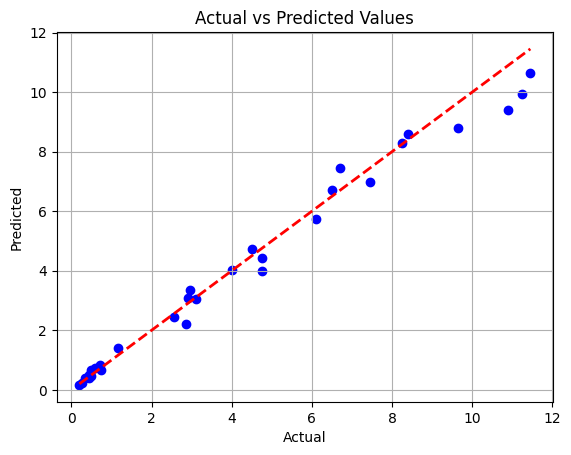

In [15]:
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Prediction based on training data

In [16]:
Y_pred1 = model.predict(X_train)

In [17]:
print(Y_pred1)

[ 2.7514455   5.286331    9.707471    0.20949337  5.959297    8.37231
  5.7575183   7.4968004   5.1754756  15.9894905   0.7980102   0.39089105
  0.362431    4.919089    9.214816    0.3749123   6.080093   19.744907
  2.5288534   6.860724    0.44728234  7.054867    0.72960234  0.8756308
  0.37847975  0.3795372   3.9994054   0.4364336   0.10800967 11.242038
  9.111384    1.3571184   2.852996    0.4911916   1.5053328   2.4897826
  1.129901    0.6114108   0.74654466  0.48983276  3.7781317   4.8550496
  0.5512992   2.7484844   4.5802784   0.47824633  1.3441845   7.4016376
  4.495199    5.397501    3.4930227   2.8888059   5.2138247   1.1498964
  0.51571625  2.8387473   1.9722304   4.507454    1.1072427   4.4996347
  6.266098    5.1115704   1.1999105  32.997868    2.2530136   5.6442275
  2.2453856   3.2497625   2.5012732  11.506294    0.66715324  2.9990437
  0.30254474  1.4582816  12.894755    2.9268675   0.2000574   4.5034184
 14.262436    0.40653184  0.416223    1.2352772   6.751296    0.491

In [18]:
mse = mean_squared_error(Y_train, Y_pred1)
R2 = r2_score(Y_train, Y_pred1)

In [19]:
print("Mean Squared Error:", mse)
print("R^2 Score:", R2)

Mean Squared Error: 0.00028047171940821076
R^2 Score: 0.9999896680984235


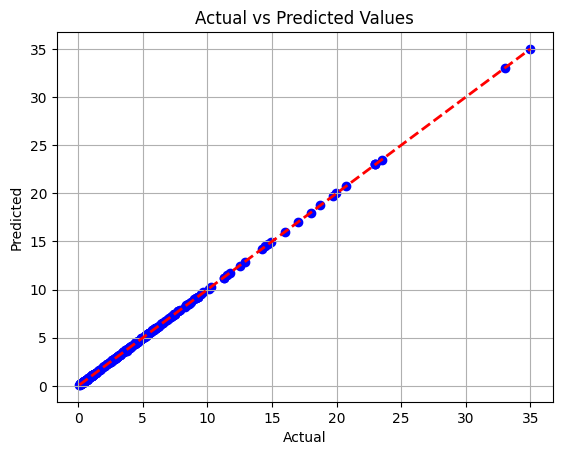

In [20]:
plt.scatter(Y_train, Y_pred1, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()